In [68]:
#simple strategy when making profits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
fb=pd.read_csv(r"C:\Users\Valentín\Valasus Dropbox\Valentín Jiménez\PC\Documents\VJDS\Programming\coursera\pythonStatisticsFinancial\jupyterNotebook\facebook.csv",index_col=0)
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

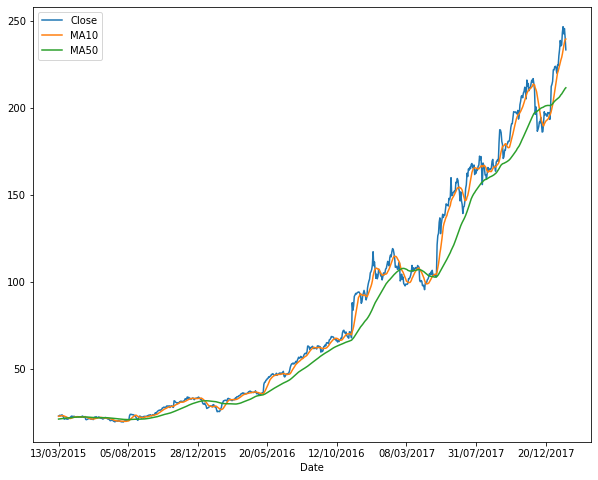

In [77]:
fb["MA10"]=fb["Close"].rolling(10).mean()
fb["MA50"]=fb["Close"].rolling(50).mean()
fb=fb.dropna()

plt.figure(figsize=(10,8))
fb["Close"].plot(legend=True)
fb["MA10"].plot(legend=True)
fb["MA50"].plot(legend=True)


In [71]:
#create indication to buy
fb["Shares"]=[1 if fb.loc[n,"MA10"]-fb.loc[n,"MA50"]>0 else 0
              for n in fb.index]

#fb[["Close","MA10","MA50","Shares"]].head(60)

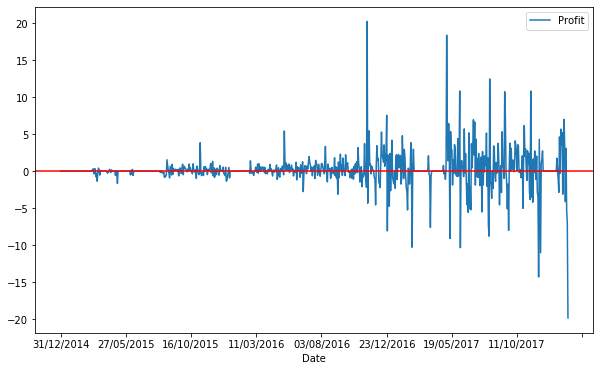

In [72]:
#if the indication is the price will go up (shares=1) we calculate de profit of the day, could be positive or negative
fb["CloseShifted"]=fb["Close"].shift(-1)
fb["Profit"]=[fb.loc[n,"CloseShifted"]-fb.loc[n,"Close"]
              if fb.loc[n,"Shares"]==1 
              else 0
              for n in fb.index]
#fb[["Shares", "Profit"]]

plt.figure(figsize=(10,6))
fb["Profit"].plot(legend=True)
plt.axhline(y=0,color="red")

In [82]:
#in this step we calculate the cumulative wealth
fb["Wealth"]=fb["Profit"].cumsum()
fb["Wealth"].head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date
13/03/2015    0.269998
16/03/2015    0.549999
17/03/2015    0.170000
18/03/2015    0.519998
19/03/2015    0.769998
20/03/2015    0.009998
23/03/2015   -0.300001
24/03/2015   -1.660000
25/03/2015   -1.730002
26/03/2015   -1.320002
Name: Wealth, dtype: float64

Total money you win is  165.54001200000002
Total money spent is 22.700001


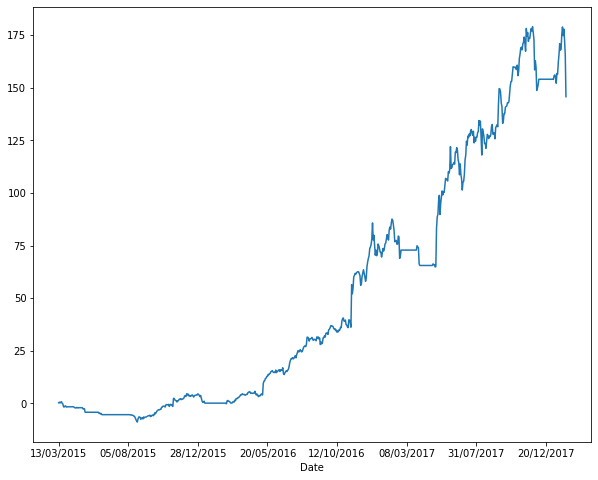

In [81]:
#print the profit and the money spent
print("Total money you win is ", fb.loc[fb.index[-2], "Wealth"])
print("Total money spent is",fb.loc[fb.index[0],"Close"])
plt.figure(figsize=(10,8))
fb["Wealth"].plot()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,CloseShifted,Profit,Wealth
Date,,,,,,,,,,,,
31/12/2014,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,NaN,0,20.129999,0.000000,0.000000
02/01/2015,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,NaN,NaN,0,19.790001,0.000000,0.000000
05/01/2015,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,NaN,NaN,0,19.190001,0.000000,0.000000
06/01/2015,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,NaN,NaN,0,19.139999,0.000000,0.000000
07/01/2015,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,NaN,NaN,0,19.860001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
30/01/2018,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
31/01/2018,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
01/02/2018,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
